# Week 4 Machine Learning

#### import packages

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.utils import shuffle

#### load wrangled dataset

In [ ]:
cleanDummy = pd.read_csv('../Data/cleanDummyDropOL.csv')

In [ ]:
cleanDummy.head()

In [ ]:
# Drop Unnamed:0 col
cleanDummy.drop('Unnamed: 0', axis=1, inplace=True) 

In [ ]:
# create x and y variables as their own array
x = cleanDummy[['totalIncome', 'famSize', 'ageYrs', 'yrsEmpl', 'UNEMPLOYED', 'genderR', 'ownsCarR', 'ownsRealtyR', 'eduLvlR', 'incomeTypeR', 'housingTypeR', 'famStatusR']]
y = cleanDummy['ApprStatus']

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state=101)

In [ ]:
# to see the shape of the data you'll be using for ML algorithm:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [ ]:
# create the linear regression model
lm = LinearRegression()
lm.fit(x_train, y_train)

## Cross validation and interpretation

In [ ]:
# see what predictions the model has made about CC approvals
predictions1 = lm.predict(x_test)
predictions1

In [ ]:
# create a scatterplot of the output values to better visualize:
plt.scatter(y_test, predictions1)

In [ ]:
# determine accuracy of the model through quantitative method: RMSE
np.sqrt(metrics.mean_squared_error(y_test, predictions1))

In [ ]:
# Accuracy score
print("Score:", lm.score(x_test, y_test))

In [ ]:
# Check Mean Square Error
metrics.mean_squared_error(y_test, predictions1)

### This model predicts CC approval correctly -0.2% of the time.  This is not a very robust model at all

In [ ]:
kfold = KFold(n_splits= 5, shuffle=True, random_state=1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

In [ ]:
# run cross validation
print(cross_val_score(lm, x,y, cv=12))

# Train a Model using Features Engineering (from Random Forest Modeling - BALANCED Dataset)

In [2]:
# import BALANCED dataset
balancedMF = pd.read_csv('../Data/balancedMF.csv')

In [3]:
balancedMF.head()

,Unnamed: 0,totalIncome,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus,ownsCarR,ownsRealtyR,eduLvlR,incomeTypeR,housingTypeR,famStatusR,genderR
0,0,238500.0,2.0,47.0,13.599184,1,1,0,1,0,0,1,1,0
1,1,135000.0,3.0,41.0,4.799551,1,0,1,1,1,0,1,1,0
2,2,157500.0,2.0,40.0,12.506759,1,0,0,1,1,0,1,1,0
3,3,225000.0,2.0,24.0,0.257363,1,1,0,1,2,1,1,0,0
4,4,67500.0,2.0,37.0,3.263585,1,1,0,1,1,0,1,2,0


In [4]:
# Drop Unnamed:0 col
balancedMF.drop('Unnamed: 0', axis=1, inplace=True) 

In [20]:
# create x and y variables as their own array using top 3 features of importance
xbal = balancedMF[['totalIncome', 'ageYrs', 'yrsEmpl']]
ybal = balancedMF['ApprStatus']

In [21]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(xbal,ybal, test_size = .3, random_state=101)

In [22]:
# to see the shape of the data you'll be using for ML algorithm:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5700, 3) (5700,)
(3800, 3) (3800,)


In [8]:
# create the linear regression model
lm2 = LinearRegression()
lm2.fit(x_train, y_train)

LinearRegression()

## Cross Validation and Interpretation using BALANCED Data, feature engineering

In [9]:
# see what predictions the model has made about CC approvals
predictions2 = lm2.predict(x_test)
predictions2

array([0.51760574, 0.52825271, 0.52361289, ..., 0.51856533, 0.53290234,
       0.51877078])

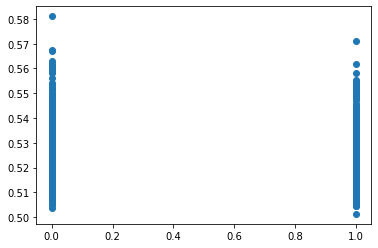

In [10]:
# create a scatterplot of the output values to better visualize:
plt.scatter(y_test, predictions2)

In [23]:
# hard to tell from the plot if our model has a good fit, so try an accuracy score

print("Score:", lm2.score(x_test, y_test))

Score: -0.001043249642636912


In [11]:
# determine accuracy of the model through quantitative method: RMSE
np.sqrt(metrics.mean_squared_error(y_test, predictions2))

0.4999211169967702

In [24]:
# Check Root Mean Square Error
np.sqrt(metrics.mean_squared_error(y_test, predictions2))

0.4999211169967702

In [27]:
# Create the Folds
kfold2 = KFold(n_splits= 5, shuffle=True, random_state=1)
for train, test in kfold2.split(xbal,ybal):
    print('train: %s, test: %s' % (train,test))

train: [   0    1    2 ... 9497 9498 9499], test: [   6    7   21 ... 9489 9491 9494]
train: [   0    1    2 ... 9495 9497 9499], test: [   3   11   16 ... 9493 9496 9498]
train: [   0    2    3 ... 9495 9496 9498], test: [   1    4    5 ... 9490 9497 9499]
train: [   0    1    2 ... 9497 9498 9499], test: [   9   10   14 ... 9478 9480 9492]
train: [   1    3    4 ... 9497 9498 9499], test: [   0    2    8 ... 9483 9486 9495]


In [26]:
# run cross validation
print(cross_val_score(lm2, xbal,ybal, cv=3))

[-0.00293363 -0.00172418 -0.00023806]


## Observations (Balanced data, training on features of importance)

* The overall accuracy of my model was pitiful, at -0.1%.
* The output of 0.249 from the Mean Square Error tells me that the model can't be too bad because it's a value close to zero.
* Upon running a K-folds cross validation, the first model was accurate -0.2% of the time, the second was accurate -0.1% of the time, and the third was accurate -0.02% of the time.  